In [1]:
!pip install ipywidgets
!pip install tensorflow-gpu==2.8.0
!pip install tensorflow-datasets==4.5.2
!pip install matplotlib==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 116.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 90.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 47.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-da

In [2]:
import tensorflow as tf;
gpus=tf.config.experimental.list_physical_devices('GPU');
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu,True);


In [3]:
for gpu in gpus:
  print(gpu);

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [4]:
import tensorflow as tf;
import tensorflow_datasets as tfds;
from matplotlib import pyplot as plt;


In [5]:
ds=tfds.load('fashion_mnist',split='train');

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteXPINR5/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteXPINR5/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [6]:
# print(ds.as_numpy_iterator().next().keys());
print(ds.as_numpy_iterator().next()['image']);

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 18]
  [ 77]
  [227]
  [227]
  [208]
  [210]
  [225]
  [216]
  [ 85]
  [ 32]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 61]
  [100]
  [ 97]
  [ 80]
  [ 57]
  [117]
  [227]
  [238]
  [115]
  [ 49]
  [ 78]
  [106]
  [108]
  [ 71]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 81]
  [105]
  [ 80]
  [ 69]
  [ 72]
  [ 64]
  [ 44]
  [ 21]
  [ 13]
  [ 44]
  [ 69]
  [ 75]
  [ 75]
  [ 80]
  [114]
  [ 80]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 26]
  [ 92]
  [ 69]
  [ 68]
  [ 75]
  [ 75]
  [ 71]
  [ 74]
  [ 83]
  [ 75]
  [ 77]
  [ 78]
  [ 74]
  [ 74]
  [ 83]
  [ 77]
  [108]
  [ 34]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [ 55]
  [ 92]
  [ 69]
  [ 74]
  [ 74]
  [ 71]
  [ 71]


In [7]:
import numpy as np
print(type(ds));

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


In [8]:
dataiterator=ds.as_numpy_iterator();

In [9]:
# every time it gives me a new image

print(dataiterator.next());

{'image': array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 18],
        [ 77],
        [227],
        [227],
        [208],
        [210],
        [225],
        [216],
        [ 85],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 61],
        [100],
        [ 97],
        [ 80],
        [ 57],
        [117],
        [227],
        [238],
        [115],
        [ 49],
        [ 78],
        [106],
        [108],
        [ 71],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 81],
        [105],
        [ 80],
        [ 6

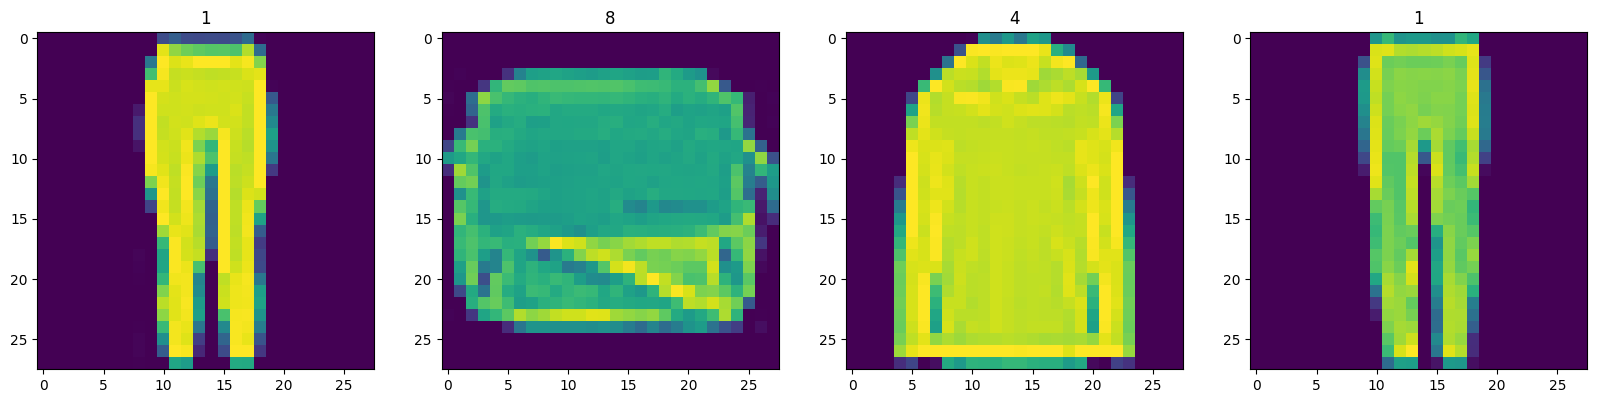

In [10]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
  batch=dataiterator.next();
  # the squeeze function usuallty reduces the dimensions;
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label']);

In [11]:
print(ax);


[<Axes: title={'center': '1'}> <Axes: title={'center': '8'}>
 <Axes: title={'center': '4'}> <Axes: title={'center': '1'}>]


In [12]:
print(np.squeeze(dataiterator.next()['image']));

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0  12   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  97 159
  161 164 167 162 131 109 137  15   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2   0 138 197 210
  209 211 216 225 227 228 225  12   0   4]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0 19

In [13]:
import numpy as np

# Create an array with a singleton dimension
arr = np.array([[[1, 2, 3]]])  # Shape: (1, 1, 3)

# Use np.squeeze() to remove singleton dimensions
arr_squeezed = np.squeeze(arr)  # Shape: (3,)

print("Original shape:", arr.shape)
print("Squeezed shape:", arr_squeezed.shape)


Original shape: (1, 1, 3)
Squeezed shape: (3,)


In [14]:
def scale_images(data):
  image=data['image'];
  return image/255;

In [15]:
ds=tfds.load('fashion_mnist',split='train');
ds=ds.map(scale_images);
ds=ds.cache();
ds=ds.shuffle(60000);
ds=ds.batch(128);
ds=ds.prefetch(64);

In [16]:
print(ds.as_numpy_iterator().next().shape);

(128, 28, 28, 1)


In [17]:
print(ds.as_numpy_iterator().next())

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

**Now we are going to make neural network**

In [18]:
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Reshape,LeakyReLU,Dropout,UpSampling2D;


In [19]:
def build_generator():
  model=Sequential();
  #takes in random values and reshapes it to 7x7x128
  #beginings  of a generated images;
  model.add(Dense(7*7*128,input_dim=128));
  model.add(LeakyReLU(0.2));
  model.add(Reshape((7,7,128)));


  #upsampling block 1
  model.add(UpSampling2D());
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2));

  #upsampling block 1
  model.add(UpSampling2D());
  model.add(Conv2D(128,5,padding='same'))
  model.add(LeakyReLU(0.2));

  #convolutional block 1
  model.add(Conv2D(128,4,padding='same'));
  model.add(LeakyReLU(0.2));

  #convolutional block 2
  model.add(Conv2D(128,4,padding='same'));
  model.add(LeakyReLU(0.2));


  #conv layer to get one  channel;
  model.add(Conv2D(1,4,padding='same',activation='sigmoid'));


  return model;

In [20]:
test_model=build_generator();

In [21]:
test_model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

In [22]:
generator=build_generator();
images=generator.predict(np.random.rand(4,128,1));
print(images.shape);
# print(img);

(4, 28, 28, 1)


In [23]:
images.shape
# (4 ima ges, height of images, width of images, filter of images(grayscale always has one filter))

(4, 28, 28, 1)

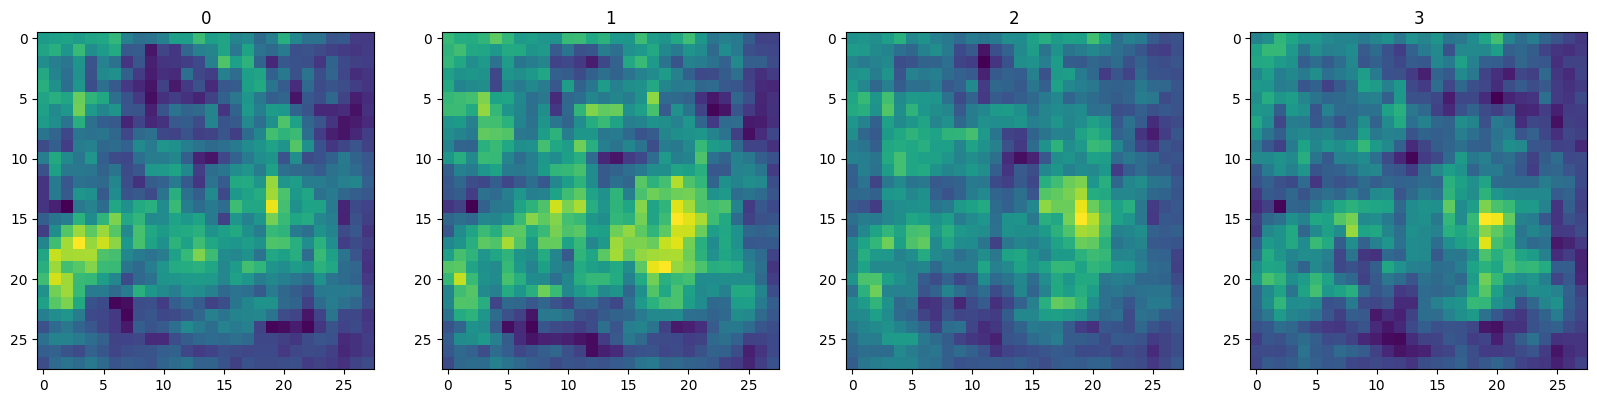

In [24]:
# get check the results of generator
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(images):
  ax[idx].imshow(np.squeeze(image))
  ax[idx].title.set_text(idx);

**Creating Discriminator function**

In [25]:
def build_discriminator():
  model=Sequential();
  #first conv block
  model.add(Conv2D(32,5,input_shape=(28,28,1)));
  model.add(LeakyReLU(0.2));
  #dropout layer used to prevent overfitting it deactivates the neurons 0.4 means
  # 40% neurons are deactivate druing training to prevent overfitting;
  model.add(Dropout(0.4));


 #second conv block;
  model.add(Conv2D(64,5));
  model.add(LeakyReLU(0.2));
  model.add(Dropout(0.4));


  #Third conv block;
  model.add(Conv2D(128,5));
  model.add(LeakyReLU(0.2));
  model.add(Dropout(0.4));

  #fourth convolutional layer
  model.add(Conv2D(256,5));
  model.add(LeakyReLU(0.2));
  model.add(Dropout(0.4));

  #flatten then pass to dense layer;
  model.add(Flatten());
  model.add(Dropout(0.4));
  model.add(Dense(1,activation='sigmoid'));














  return model;

In [26]:
discriminator=build_discriminator();


In [27]:
discriminator.summary();

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)      

In [28]:
results=discriminator.predict(images);
for i in results:
  if i >=0.5:
    print("Fake");
  else:
    print("Real image");

Fake
Fake
Fake
Fake


In [29]:
discriminator.predict(np.expand_dims(images[0],0))

array([[0.50254107]], dtype=float32)

**Custom training loop**

In [30]:
#import loss functions and optimizer functions
from tensorflow.keras.optimizers import Adam;
from tensorflow.keras.losses import BinaryCrossentropy;


In [31]:
#optimizer for generator and discriminator;
g_opt=Adam(learning_rate=0.0001);
d_opt=Adam(learning_rate=0.00001);

In [32]:
#loss function
g_loss=BinaryCrossentropy();
d_loss=BinaryCrossentropy();

In [33]:
from tensorflow.keras.models import Model

In [34]:
print(tf.random.normal((6,128,1)));

tf.Tensor(
[[[ 1.16790748e+00]
  [ 7.30473280e-01]
  [-6.87233984e-01]
  [-5.50308526e-01]
  [-3.74245912e-01]
  [ 6.59659058e-02]
  [-6.60824120e-01]
  [ 2.20080450e-01]
  [ 8.41863692e-01]
  [ 4.04813468e-01]
  [-2.86791831e-01]
  [ 3.53656948e-01]
  [ 7.82866180e-02]
  [-5.11276603e-01]
  [ 8.75440478e-01]
  [-2.60194868e-01]
  [-7.55234420e-01]
  [ 1.20140955e-01]
  [-4.04728716e-03]
  [ 1.10450792e+00]
  [-7.21916631e-02]
  [-9.01665151e-01]
  [ 5.78789175e-01]
  [ 9.04452682e-01]
  [-4.58329916e-01]
  [ 4.11100417e-01]
  [ 3.03683579e-01]
  [ 7.30115831e-01]
  [ 1.97827592e-01]
  [ 1.70485425e+00]
  [-6.23349726e-01]
  [ 1.75823462e+00]
  [ 1.82901108e+00]
  [-3.62099744e-02]
  [-6.11021101e-01]
  [-1.00206780e+00]
  [ 9.69071329e-01]
  [ 1.05257308e+00]
  [-6.08394779e-02]
  [ 1.13553345e+00]
  [ 9.36159268e-02]
  [ 1.66358694e-01]
  [ 4.62317228e-01]
  [-2.28458047e-02]
  [-8.89313817e-01]
  [-1.47620833e+00]
  [-4.91419047e-01]
  [ 1.40868694e-01]
  [-1.51499832e+00]
  [ 6.600

In [35]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [36]:
@tf.function
def train_step():
  pass;

In [37]:
class MyClass:
    def __init__(self, arg1, arg2, *args, **kwargs):
        self.arg1 = arg1
        self.arg2 = arg2

        # *args example: Collect additional positional arguments
        self.additional_args = args  # args is a tuple

        # **kwargs example: Collect additional keyword arguments
        self.additional_kwargs = kwargs  # kwargs is a dictionary

# Creating an object of MyClass with different arguments
obj1 = MyClass("value1", "value2", 3, 4, 5, option1="A", option2="B")

# Accessing attributes of the object
print(obj1.arg1)  # Output: value1
print(obj1.arg2)  # Output: value2
print(obj1.additional_args)  # Output: (3, 4, 5)
print(obj1.additional_kwargs)  # Output: {'option1': 'A', 'option2': 'B'}


value1
value2
(3, 4, 5)
{'option1': 'A', 'option2': 'B'}


In [38]:
#create instance of subclassed model;
fashgan=FashionGAN(generator,discriminator);

In [39]:
#compile the fashionGan;
fashgan.compile(g_opt,d_opt,g_loss,d_loss);

In [40]:
import os;
from tensorflow.keras.preprocessing.image import array_to_img;
from tensorflow.keras.callbacks import Callback

In [41]:
#saving the generated images of every epochs
class ModelMonitor(Callback):
  def __init__(self,num_img=3,latent_dim=128):
    self.num_img=num_img;
    self.latent_dim=latent_dim;

  def on_epoch_end(self,epoch,logs=None):
    random_latent_vectors=tf.random.uniform((self.num_img,self.latent_dim,1));
    generated_images=self.model.generator(random_latent_vectors);
    generated_images*=255;
    generated_images.numpy();
    for i in range(self.num_img):
      img=array_to_img(generated_images[i]);
      img.save(os.path.join('images',f'generated_img_{epoch}_{i}.png'));

**Train**

In [43]:
# recommend 2000 epochs
hist=fashgan.fit(ds,epochs=20,callbacks=[ModelMonitor()]);

Epoch 1/20
  6/469 [..............................] - ETA: 1:06 - d_loss: 0.4151 - g_loss: 0.9452

469/469 [==============================] - 68s 144ms/step - d_loss: 0.3557 - g_loss: 2.3050
Epoch 2/20
469/469 [==============================] - 68s 144ms/step - d_loss: 0.2774 - g_loss: 2.6452
Epoch 3/20
469/469 [==============================] - 68s 145ms/step - d_loss: 0.2746 - g_loss: 2.6883
Epoch 4/20
469/469 [==============================] - 68s 146ms/step - d_loss: 0.2725 - g_loss: 2.7027
Epoch 5/20
469/469 [==============================] - 68s 145ms/step - d_loss: 0.2712 - g_loss: 2.6985
Epoch 6/20
469/469 [==============================] - 68s 145ms/step - d_loss: 0.2695 - g_loss: 2.6982
Epoch 7/20
469/469 [==============================] - 68s 145ms/step - d_loss: 0.2695 - g_loss: 2.6953
Epoch 8/20
469/469 [==============================] - 68s 145ms/step - d_loss: 0.2685 - g_loss: 2.7106
Epoch 9/20
469/469 [==============================] - 68s 145ms/step - d_loss: 0.2676 - g_loss: 2.7231
Epoch 10/20
469/469 [==============================] - 68s 145ms/step - d_loss: 0.26

**Test out the generator**

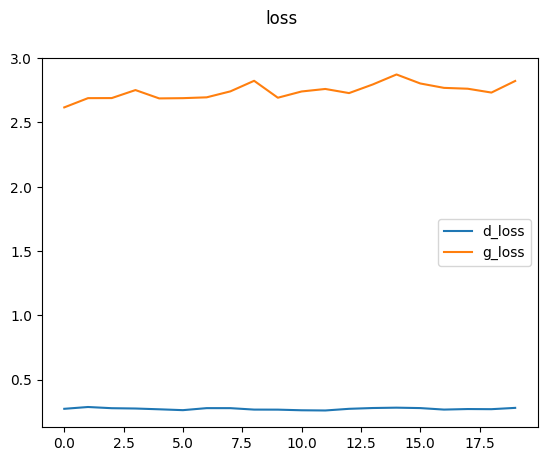

In [44]:
plt.suptitle('loss');
plt.plot(hist.history['d_loss'],label='d_loss');
plt.plot(hist.history['g_loss'],label='g_loss');
plt.legend();
plt.show();

In [45]:
imgs=generator.predict(tf.random.normal((16,128,1)));


array([[[[1.98395461e-24],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        [[0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [0.00000000e+00]],

        ...,

        [[1.91941460e-36],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [0.00000000e+00],
         [1.74950882e-35]],

        [[1.59296781e-23],
         [0.00000000e+00],
         [0.00000000e+00],
         ...,
         [0.00000000e+00],
         [9.80469277e-35],
         [1.07503648e-20]],

        [[2.50059392e-12],
         [2.15487012e-23],
         [2.39833664e-29],
         ...,
 

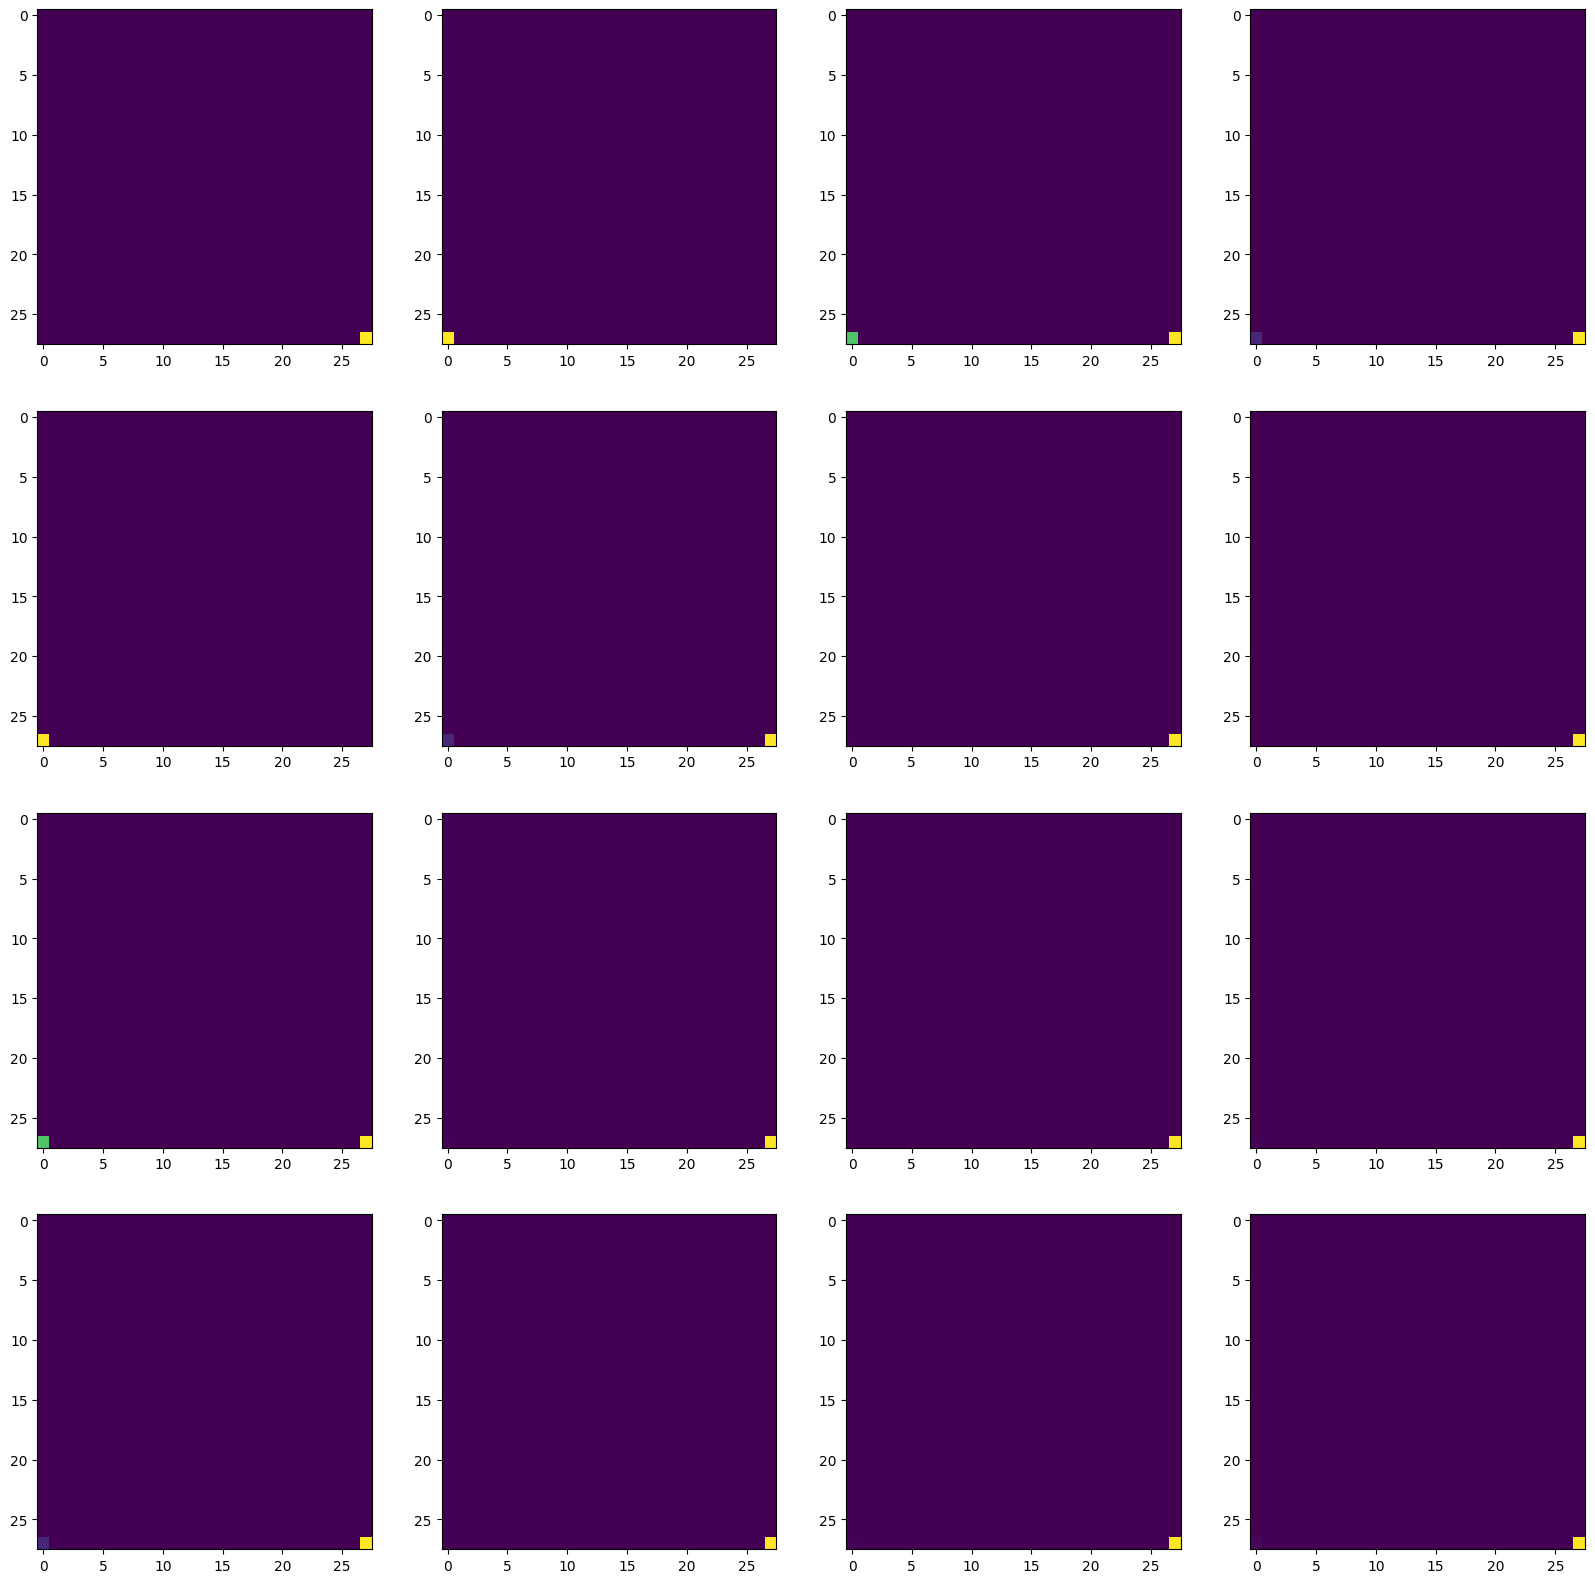

In [46]:
#after traning the networks for 20 epochs now we see the results
# we need to train our model on large num of epochs like 2000 but for now 20 is enough otherwise it takes a long time;
#let's see how our generator generates images;
fig,ax=plt.subplots(ncols=4,nrows=4,figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1]);

we are not able to see results clearly because we train our generator for just 20 epochs more epoch more best results

In [59]:
#now let's try pretrained generator model on 2000 epochs
generator.load_weights('generator.h5');

In [56]:
imgs=generator.predict(tf.random.normal((16,128,1)));

In [ ]:
fig,ax=plt.subplots(ncols=4,nrows=4,figsize=(20,20))
for r in range(4):
  for c in range(4):
    ax[r][c].imshow(imgs[(r+1)*(c+1)-1]);

In [54]:
#saving the models;
generator.save('generator.h5');
discriminator.save('discriminator.h5');
